## Frequency curves for hydraulic boundary conditions
This notebook facilitates plotting the frequency curves for hydraulic boundary conditions for overflow & water level based on preprocessor output

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import sqlite3
import re
from preprocessing.step4_build_sqlite_db.read_intermediate_outputs import read_design_table
import seaborn as sns
sns.set_style("whitegrid")

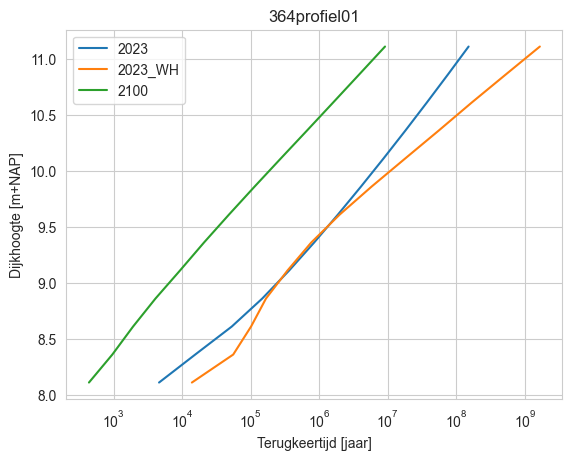

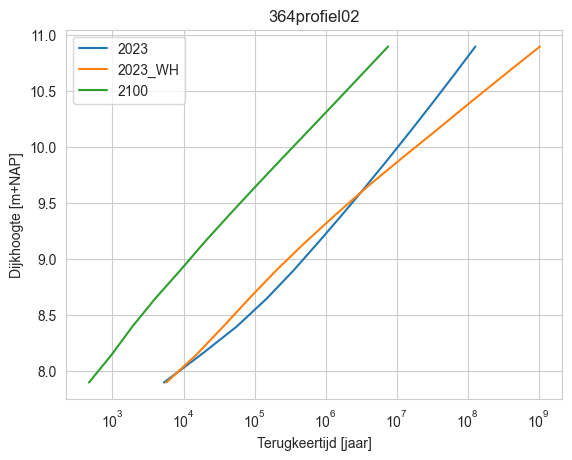

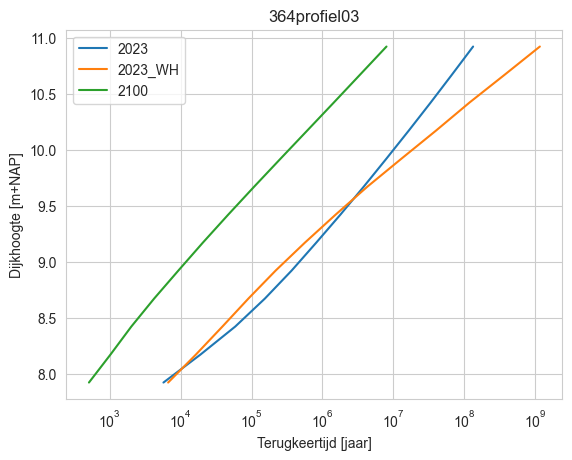

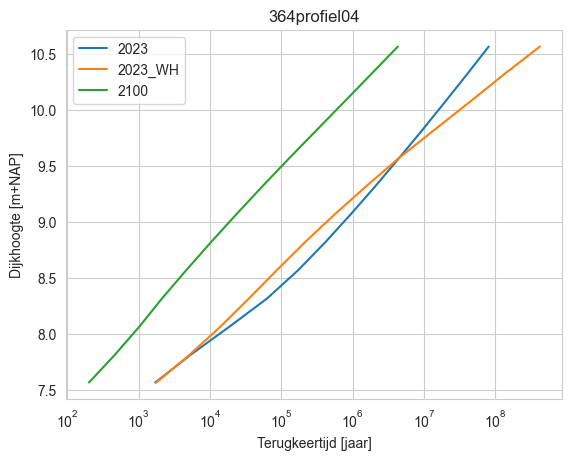

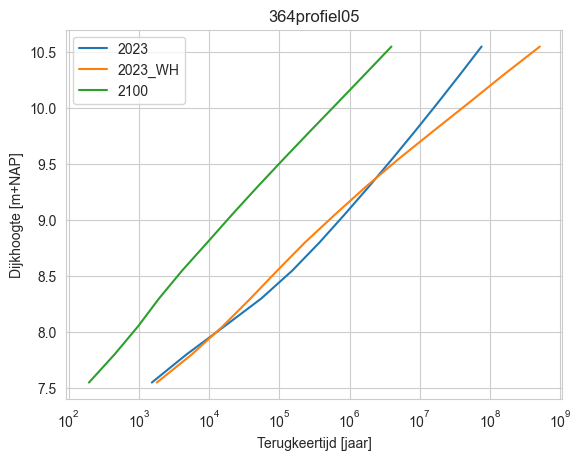

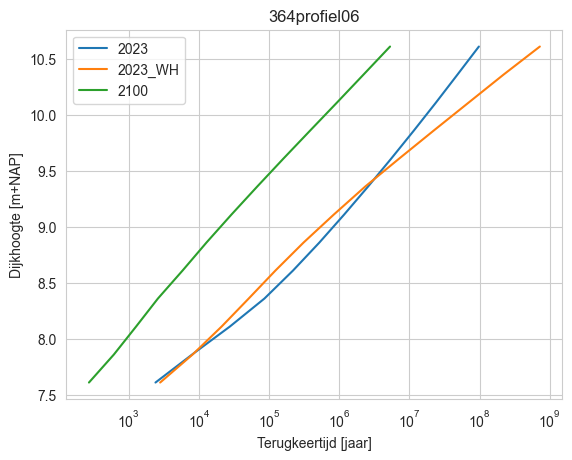

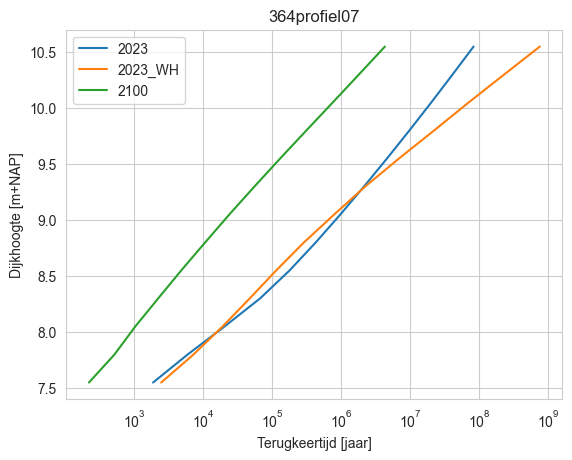

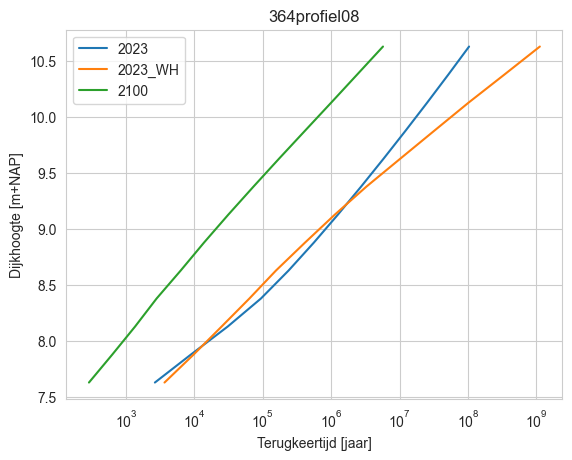

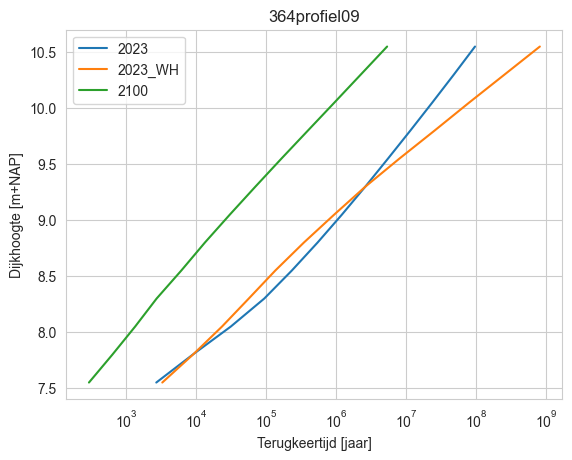

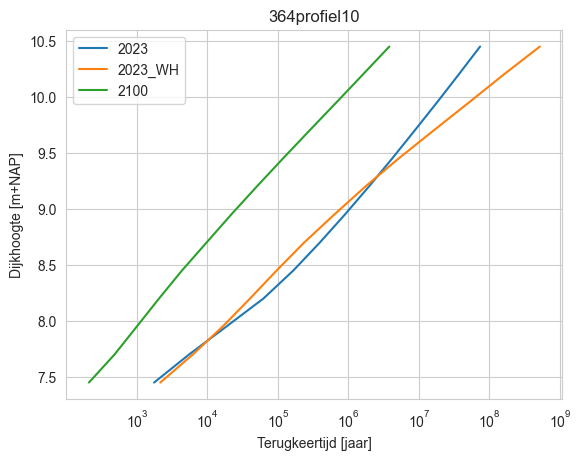

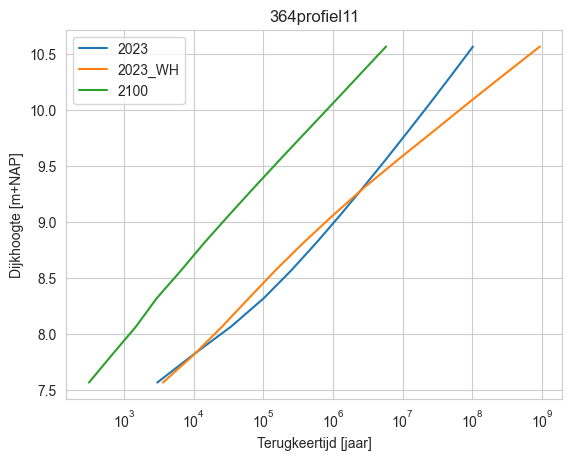

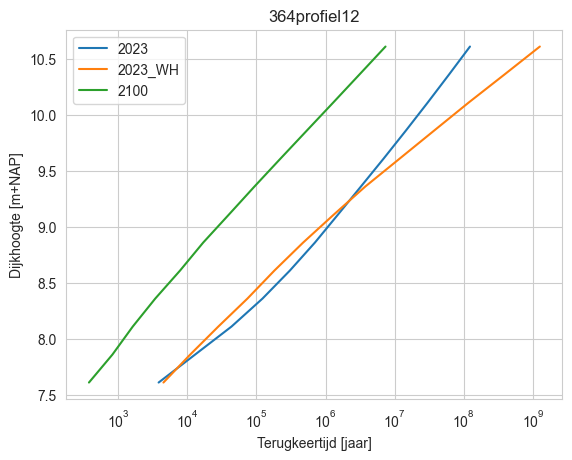

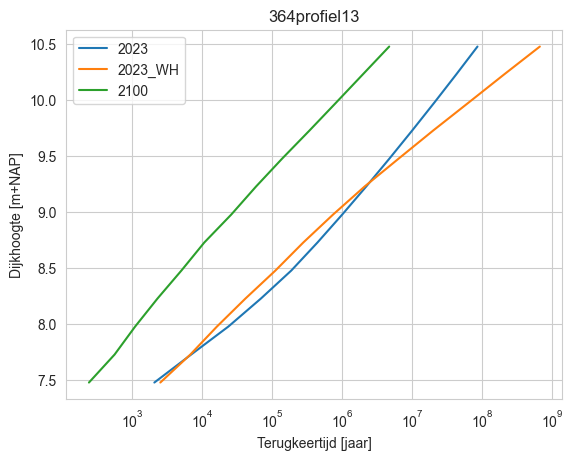

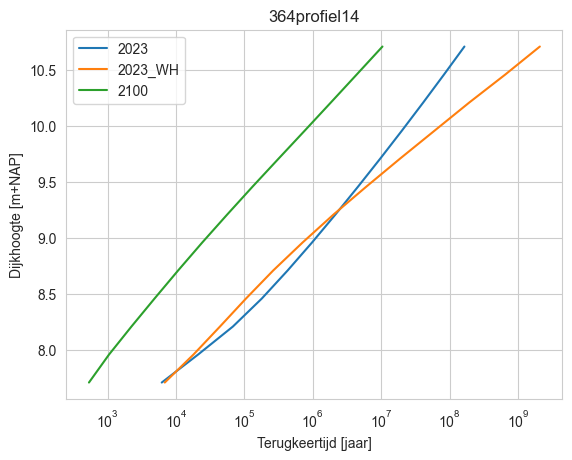

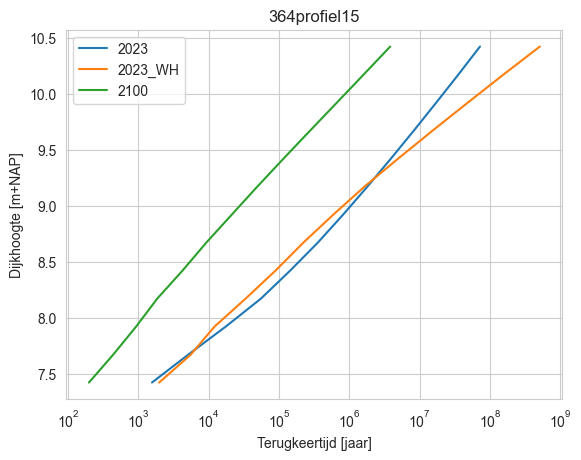

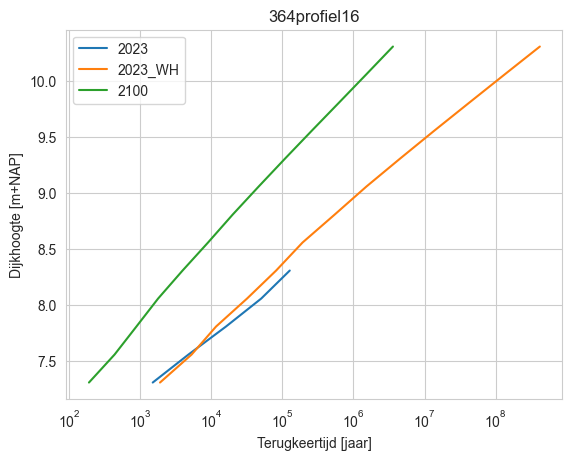

In [ ]:
def plot_T_h(files):
    pass
    fig, ax = plt.subplots()
    for file in files:
        label = file.parent.parent.name
        data = read_design_table(file)
        ax.plot(data['Return period (year)'], data['Value'], label=label)

    ax.set_xlabel('Terugkeertijd [jaar]')
    if 'waterlevel' in str(files[0]):
        ax.set_ylabel('Waterstand [m+NAP]')
    else:
        ax.set_ylabel('Dijkhoogte [m+NAP]')
    ax.set_xscale('log')
    ax.set_title(file.parent.name)
    ax.legend()
    plt.savefig(files[0].parent.parent.parent.joinpath('plots',file.parent.name + '.png'))
    

main_path = Path(r'n:\Projects\11209000\11209353\B. Measurements and calculations\008 - Resultaten Proefvlucht\WAM\sommen_2100\intermediate_results\HR_results\overflow')
#get all subdirs in main_path and store in list
subdirs = [x for x in main_path.iterdir() if x.is_dir() and not 'plots' in str(x)]
#get the subdirs for the first subdir these are locations
locations = [x for x in subdirs[0].iterdir() if x.is_dir()]

if not main_path.joinpath('plots').exists():
    main_path.joinpath('plots').mkdir()
    
#for each location in locations get the files in each of the subdirs by making a tuple of paths with subdir/location/DESIGNTABLE_location.txt
for location in locations:
    files = [subdir.joinpath(location.name,'DESIGNTABLE_{}.txt'.format(location.name)) for subdir in subdirs]


    plot_T_h(files)
    #plot_T_h(files)




In [12]:
paths

[WindowsPath('n:/Projects/11209000/11209353/B. Measurements and calculations/008 - Resultaten Proefvlucht/WAM/sommen_2100/intermediate_results/HR_results/waterlevel/2023/364profiel01/DESIGNTABLE_364profiel01.txt'),
 WindowsPath('n:/Projects/11209000/11209353/B. Measurements and calculations/008 - Resultaten Proefvlucht/WAM/sommen_2100/intermediate_results/HR_results/waterlevel/2023_WH/364profiel01/DESIGNTABLE_364profiel01.txt'),
 WindowsPath('n:/Projects/11209000/11209353/B. Measurements and calculations/008 - Resultaten Proefvlucht/WAM/sommen_2100/intermediate_results/HR_results/waterlevel/2100/364profiel01/DESIGNTABLE_364profiel01.txt')]